In [249]:
import pandas as pd
import glob
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Load Datasets

In [250]:
def combine_csv_files(folder_path):
    all_files = glob.glob(os.path.join(folder_path, '*.csv'))
    df_list = [pd.read_csv(file) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

sd_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-datasets/sd'
la_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-datasets/la'

sd_weather_19_23 = combine_csv_files(sd_path)
la_weather_19_23 = combine_csv_files(la_path)

sd_output_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/san_diego_weather_combined.csv'
la_output_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_weather_combined.csv'

os.makedirs(os.path.dirname(sd_output_path), exist_ok=True)

sd_weather_19_23.to_csv(sd_output_path, index=False)
la_weather_19_23.to_csv(la_output_path, index=False)

In [251]:
def load_traffic_data(file_path):
    return pd.read_csv(file_path)

def load_weather_data(file_path):
    return pd.read_csv(file_path)

sd_traffic_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/TIMS_SD_Crashes2013-2024.csv'
la_traffic_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/LA2013-20149crashes.csv'
sd_weather_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/san_diego_weather_combined.csv'
la_weather_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_weather_combined.csv'

sd_traffic = load_traffic_data(sd_traffic_path)
la_traffic = load_traffic_data(la_traffic_path)
sd_weather = load_weather_data(sd_weather_path)
la_weather = load_weather_data(la_weather_path)

In [252]:
sd_traffic.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.093777,32.694394
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,0,0,-,-,32.85306,-116.86512,SAN DIEGO,UNINCORPORATED,-116.864564,32.853113
2,5639726,2013,2015-01-14,3711,2013-02-06,1940,3792,3711,3,5,...,0,1,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.079670,32.735391
3,5639817,2013,2015-01-15,3711,2013-02-18,1937,4243,NaN,1,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.122654,32.917255
4,5639818,2013,2013-03-14,3711,2013-02-01,1143,3661,SANDI,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.159290,32.990074


In [253]:
sd_traffic.dtypes

CASE_ID             int64
ACCIDENT_YEAR       int64
PROC_DATE          object
JURIS               int64
COLLISION_DATE     object
                   ...   
LONGITUDE         float64
COUNTY             object
CITY               object
POINT_X           float64
POINT_Y           float64
Length: 80, dtype: object

In [254]:
sd_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"San Diego, CA, United States",2022-01-01,63.6,53.0,59.1,63.6,53.0,59.1,45.9,62.0,...,10.5,5,NaN,2022-01-01T06:51:07,2022-01-01T16:53:46,0.97,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
1,"San Diego, CA, United States",2022-01-02,66.5,47.6,55.2,66.5,47.6,55.2,38.9,56.8,...,11.4,5,NaN,2022-01-02T06:51:19,2022-01-02T16:54:31,0.00,Clear,Clear conditions throughout the day.,clear-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
2,"San Diego, CA, United States",2022-01-03,60.2,39.5,50.2,60.2,39.5,50.1,39.7,68.6,...,11.5,5,NaN,2022-01-03T06:51:28,2022-01-03T16:55:17,0.03,Clear,Clear conditions throughout the day.,clear-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
3,"San Diego, CA, United States",2022-01-04,59.3,40.4,50.5,59.3,40.4,50.4,43.5,77.6,...,11.0,5,NaN,2022-01-04T06:51:36,2022-01-04T16:56:04,0.07,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
4,"San Diego, CA, United States",2022-01-05,63.5,43.2,52.9,63.5,43.2,52.9,46.0,78.7,...,11.0,5,NaN,2022-01-05T06:51:42,2022-01-05T16:56:52,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."


In [255]:
sd_weather.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [256]:
la_traffic.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9389661,2021,2022-01-13,1976,2021-12-06,1904,560,NaN,1,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,WHITTIER,-118.039719,33.977261
1,9396835,2022,2022-02-10,1942,2022-01-12,1840,37724,1806,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.256432,33.953281
2,9401153,2021,2022-02-11,1953,2021-12-15,1434,7231,1953,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,PASADENA,-118.121292,34.137810
3,9406663,2022,2022-03-07,1941,2022-02-03,1633,11099,NaN,4,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LONG BEACH,-118.141579,33.769855
4,9435305,2021,2022-04-22,1942,2021-12-08,1820,34482,2014,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.302330,34.076279


In [257]:
la_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Los Angeles, CA, United States",2018-01-01,69.8,47.6,56.5,69.8,47.6,56.5,48.1,76.7,...,9.2,5,NaN,2018-01-01T06:58:43,2018-01-01T16:54:46,0.50,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,7..."
1,"Los Angeles, CA, United States",2018-01-02,75.1,53.4,60.4,75.1,53.4,60.4,50.0,72.5,...,9.6,5,NaN,2018-01-02T06:58:53,2018-01-02T16:55:32,0.52,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,D4813,..."
2,"Los Angeles, CA, United States",2018-01-03,74.1,54.2,62.0,74.1,54.2,62.0,41.6,50.4,...,4.6,2,NaN,2018-01-03T06:59:02,2018-01-03T16:56:19,0.56,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,722874..."
3,"Los Angeles, CA, United States",2018-01-04,73.7,54.2,62.2,73.7,54.2,62.2,47.1,60.2,...,16.0,5,NaN,2018-01-04T06:59:09,2018-01-04T16:57:07,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"A2968,KHHR,72295023174,KBUR,72295603167,D4813,..."
4,"Los Angeles, CA, United States",2018-01-05,71.4,54.6,61.8,71.4,54.6,61.8,53.8,76.2,...,10.8,5,NaN,2018-01-05T06:59:14,2018-01-05T16:57:56,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,7..."


# Data Preprocessing

In [258]:
# Traffic data
sd_traffic['COLLISION_DATE'] = pd.to_datetime(sd_traffic['COLLISION_DATE'], errors='coerce')
la_traffic['COLLISION_DATE'] = pd.to_datetime(la_traffic['COLLISION_DATE'], errors='coerce')

sd_traffic.dropna(subset=['COLLISION_DATE'], inplace=True)
la_traffic.dropna(subset=['COLLISION_DATE'], inplace=True)

sd_traffic.drop(columns=['OFFICER_ID', 'REPORTING_DISTRICT', 'PROC_DATE'], inplace=True, errors='ignore')
la_traffic.drop(columns=['OFFICER_ID', 'REPORTING_DISTRICT', 'PROC_DATE'], inplace=True, errors='ignore')


In [259]:
# Weather Data
sd_weather['datetime'] = pd.to_datetime(sd_weather['datetime'], errors='coerce')
la_weather['datetime'] = pd.to_datetime(la_weather['datetime'], errors='coerce')

sd_weather.dropna(subset=['datetime'], inplace=True)
la_weather.dropna(subset=['datetime'], inplace=True)

sd_weather.drop(columns=['name', 'feelslikemax', 'feelslikemin', 'feelslike', 
                         'solarenergy', 'sunrise', 'sunset', 'stations'], inplace=True, errors='ignore')

la_weather.drop(columns=['name', 'feelslikemax', 'feelslikemin', 'feelslike', 
                         'solarenergy', 'sunrise', 'sunset', 'stations'], inplace=True, errors='ignore')

In [260]:
# Clean up text fields
sd_traffic['CITY'] = sd_traffic['CITY'].str.lower().str.strip()
la_traffic['CITY'] = la_traffic['CITY'].str.lower().str.strip()

sd_weather['conditions'] = sd_weather['conditions'].str.lower().str.strip()
la_weather['conditions'] = la_weather['conditions'].str.lower().str.strip()

In [261]:
sd_combined = pd.merge(
    sd_traffic,
    sd_weather[['datetime', 'icon']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

la_combined = pd.merge(
    la_traffic,
    la_weather[['datetime', 'icon']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

sd_combined['icon'].fillna(method='ffill', inplace=True)
la_combined['icon'].fillna(method='ffill', inplace=True)

In [262]:
# Map weather conditions
weather_mapping = {
    'clear-day': 'clear',
    'clear-night': 'clear',
    'partly-cloudy-day': 'cloudy',
    'partly-cloudy-night': 'cloudy',
    'cloudy': 'cloudy',
    'rain': 'rainy',
    'wind': 'windy',
    'snow': 'snowy',
    'sleet': 'snowy',
    'fog': 'foggy',
    'overcast': 'cloudy'
}

sd_combined['weather_group'] = sd_combined['icon'].map(weather_mapping)
la_combined['weather_group'] = la_combined['icon'].map(weather_mapping)

# Remove rows with missing weather_group
sd_combined.dropna(subset=['weather_group'], inplace=True)
la_combined.dropna(subset=['weather_group'], inplace=True)

In [ ]:
sd_combined = sd_combined[
    (sd_combined['COLLISION_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (sd_combined['COLLISION_DATE'] <= pd.Timestamp('2024-12-31'))
]

la_combined = la_combined[
    (la_combined['COLLISION_DATE'] >= pd.Timestamp('2018-01-01')) & 
    (la_combined['COLLISION_DATE'] <= pd.Timestamp('2024-12-31'))
]

output_path_sd = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/sd_combined.csv'
output_path_la = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_combined.csv'

sd_combined.to_csv(output_path_sd, index=False)
la_combined.to_csv(output_path_la, index=False)

In [264]:
def extract_hour(df):
    df['COLLISION_TIME'] = pd.to_numeric(df['COLLISION_TIME'], errors='coerce')
    df['COLLISION_TIME'] = df['COLLISION_TIME'].astype(str).str.zfill(4)
    df['hour'] = pd.to_datetime(df['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
    df.dropna(subset=['hour'], inplace=True)
    df['hour'] = df['hour'].astype(int)
    
extract_hour(sd_combined_filtered)
extract_hour(la_combined_filtered)

In [ ]:
sd_combined['COLLISION_DATE'] = pd.to_datetime(sd_combined['COLLISION_DATE'], errors='coerce')
la_combined['COLLISION_DATE'] = pd.to_datetime(la_combined['COLLISION_DATE'], errors='coerce')
sd_combined['month'] = sd_combined['COLLISION_DATE'].dt.month
la_combined['month'] = la_combined['COLLISION_DATE'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

season_order = ['Spring', 'Summer', 'Fall', 'Winter']
sd_combined['season'] = pd.Categorical(
    sd_combined['month'].apply(get_season), 
    categories=season_order, 
    ordered=True
)
la_combined['season'] = pd.Categorical(
    la_combined['month'].apply(get_season), 
    categories=season_order, 
    ordered=True
)

In [266]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

sd_weather = remove_outliers(sd_weather, 'temp')
la_weather = remove_outliers(la_weather, 'temp')

In [267]:
sd_combined.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,CHP_SHIFT,POPULATION,CNTY_CITY_LOC,SPECIAL_COND,...,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,datetime,icon,weather_group,month,season
3524,8008543,2020,3703,2020-10-08,624,4,5,3,3703,0,...,-117.182571,SAN DIEGO,coronado,-117.182503,32.685242,2020-10-08,partly-cloudy-day,cloudy,10,Fall
3962,81351988,2020,3706,2020-11-04,1750,3,5,6,3706,0,...,-117.070068,SAN DIEGO,escondido,-117.070374,33.140549,2020-11-04,partly-cloudy-day,cloudy,11,Fall
3965,81355892,2020,3706,2020-11-18,1724,3,5,6,3706,0,...,-117.096329,SAN DIEGO,escondido,-117.096169,33.143250,2020-11-18,partly-cloudy-day,cloudy,11,Fall
3966,81356857,2020,3706,2020-11-24,716,2,5,6,3706,0,...,-117.098251,SAN DIEGO,escondido,-117.098106,33.144180,2020-11-24,partly-cloudy-day,cloudy,11,Fall
3967,81357838,2020,3706,2020-11-30,1520,1,5,6,3706,0,...,-117.071388,SAN DIEGO,escondido,-117.070869,33.101471,2020-11-30,partly-cloudy-day,cloudy,11,Fall


In [268]:
print(sd_combined.isnull().sum())
print(la_combined.isnull().sum())

CASE_ID           0
ACCIDENT_YEAR     0
JURIS             0
COLLISION_DATE    0
COLLISION_TIME    0
                 ..
datetime          0
icon              0
weather_group     0
month             0
season            0
Length: 82, dtype: int64
CASE_ID           0
ACCIDENT_YEAR     0
JURIS             0
COLLISION_DATE    0
COLLISION_TIME    0
                 ..
datetime          0
icon              0
weather_group     0
month             0
season            0
Length: 82, dtype: int64


# Time-Series Analysis

#### Monthly and Yearly Trend of Traffic Accidents

In [ ]:
sd_combined['COLLISION_DATE'] = pd.to_datetime(sd_combined['COLLISION_DATE'])
la_combined['COLLISION_DATE'] = pd.to_datetime(la_combined['COLLISION_DATE'])

In [ ]:
sd_combined['year'] = sd_combined['COLLISION_DATE'].dt.year
sd_combined['month'] = sd_combined['COLLISION_DATE'].dt.month
sd_combined['day_of_week'] = sd_combined['COLLISION_DATE'].dt.dayofweek

la_combined['year'] = la_combined['COLLISION_DATE'].dt.year
la_combined['month'] = la_combined['COLLISION_DATE'].dt.month
la_combined['day_of_week'] = la_combined['COLLISION_DATE'].dt.dayofweek

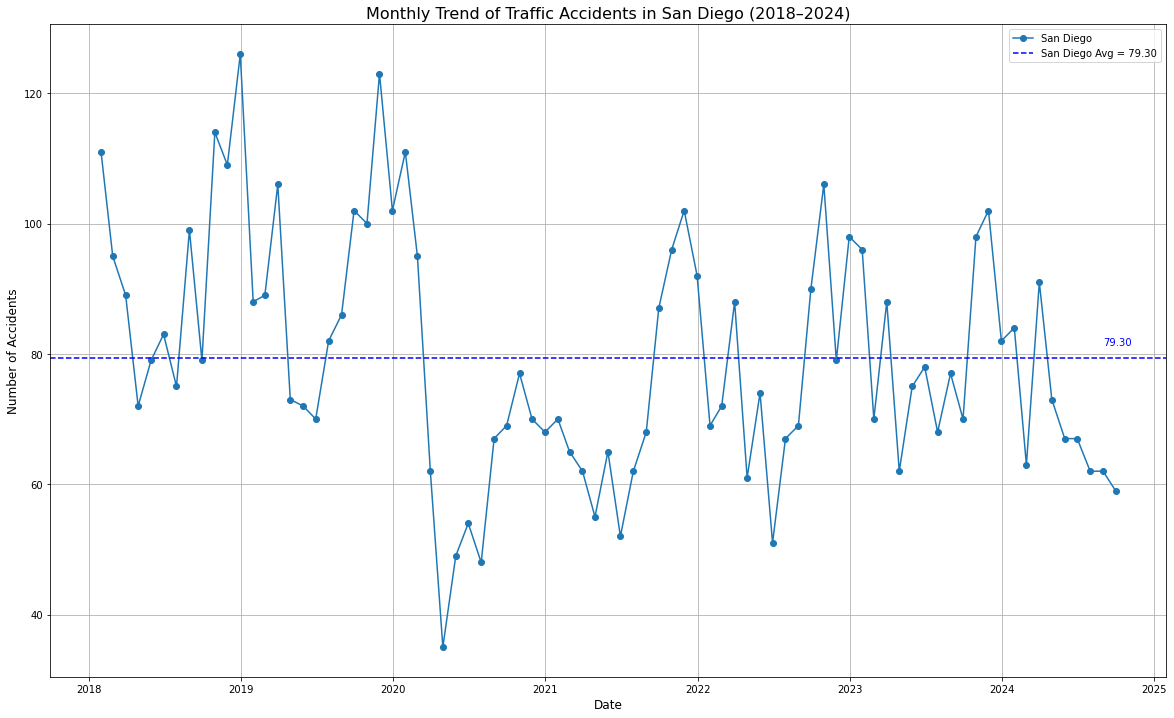

In [271]:
sd_monthly = sd_combined.resample('M', on='COLLISION_DATE').size()
sd_monthly_avg = sd_monthly.mean()

plt.figure(figsize=(20, 12))
plt.plot(sd_monthly, label='San Diego', marker='o')
plt.axhline(sd_monthly_avg, color='blue', linestyle='--', label=f'San Diego Avg = {sd_monthly_avg:.2f}')
plt.text(sd_monthly.index[-2], sd_monthly_avg + 2, f'{sd_monthly_avg:.2f}', color='blue')

plt.title('Monthly Trend of Traffic Accidents in San Diego (2018–2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

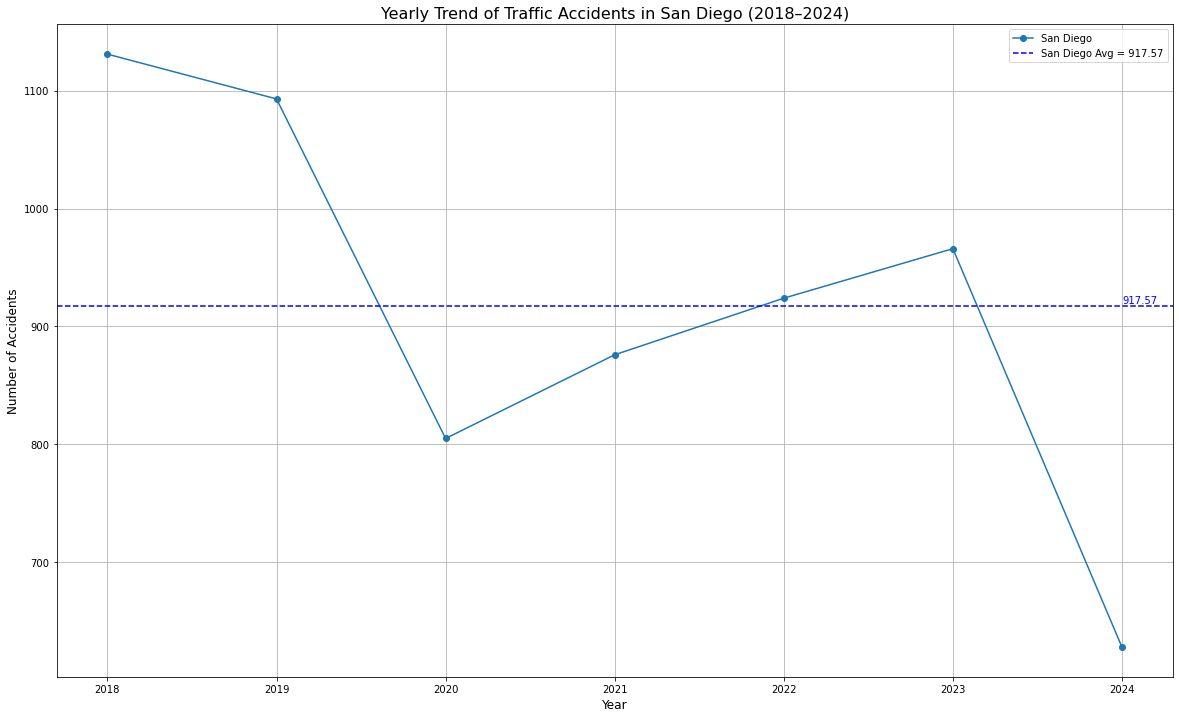

In [272]:
sd_yearly = sd_combined['year'].value_counts().sort_index()
sd_yearly_avg = sd_yearly.mean()

plt.figure(figsize=(20, 12))
sd_yearly.plot(label='San Diego', marker='o')
plt.axhline(sd_yearly_avg, color='blue', linestyle='--', label=f'San Diego Avg = {sd_yearly_avg:.2f}')
plt.text(sd_yearly.index[-1], sd_yearly_avg + 2, f'{sd_yearly_avg:.2f}', color='blue')

plt.title('Yearly Trend of Traffic Accidents in San Diego (2018–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### Weather Impact on Accidents

In [273]:
sd_filtered = sd_combined[
    (sd_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01')) &
    (sd_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31'))
]

In [274]:
sd_weather_trend = sd_filtered.groupby(
    ['year', 'month', 'weather_group']
).size().unstack(fill_value=0)

(array([0, 1, 2]),
 [Text(0, 0, 'cloudy'), Text(1, 0, 'rainy'), Text(2, 0, 'clear')])

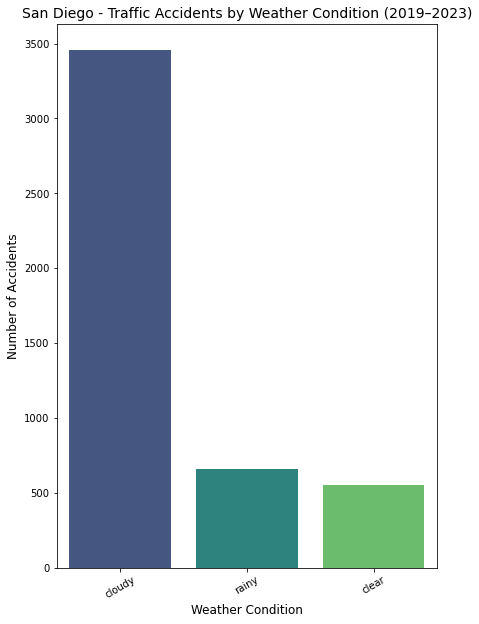

In [275]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(
    x='weather_group', 
    data=sd_filtered, 
    palette='viridis',  # Choose a colorful palette
    order=sd_filtered['weather_group'].value_counts().index
)
plt.title('San Diego - Traffic Accidents by Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30)

In [277]:
sd_filtered['COLLISION_TIME'] = pd.to_numeric(sd_filtered['COLLISION_TIME'], errors='coerce')
sd_filtered['COLLISION_TIME'] = sd_filtered['COLLISION_TIME'].astype(str).str.zfill(4)
sd_filtered['hour'] = pd.to_datetime(sd_filtered['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
sd_filtered = sd_filtered.dropna(subset=['hour'])
sd_filtered['hour'] = sd_filtered['hour'].astype(int)

/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_35419/48397126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_filtered['COLLISION_TIME'] = pd.to_numeric(sd_filtered['COLLISION_TIME'], errors='coerce')
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_35419/48397126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_filtered['COLLISION_TIME'] = sd_filtered['COLLISION_TIME'].astype(str).str.zfill(4)
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_35419/48397126.py:3:

#### Accidents by Day of the Week

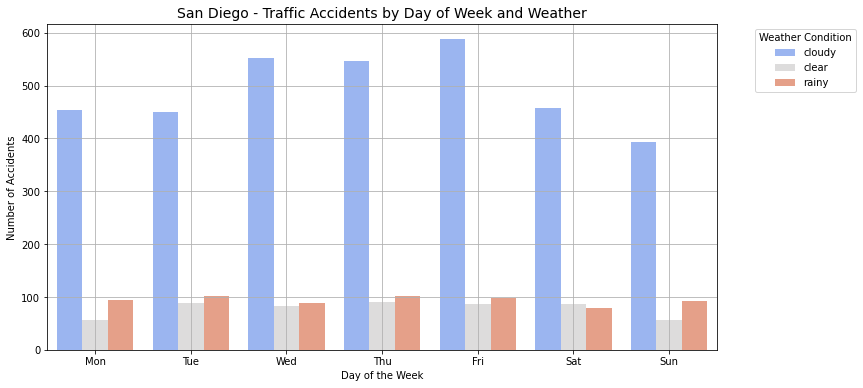

In [278]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=sd_filtered, palette='coolwarm')
plt.title('San Diego - Traffic Accidents by Day of Week and Weather', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Traffic Accidents 3-Month Rolling Average

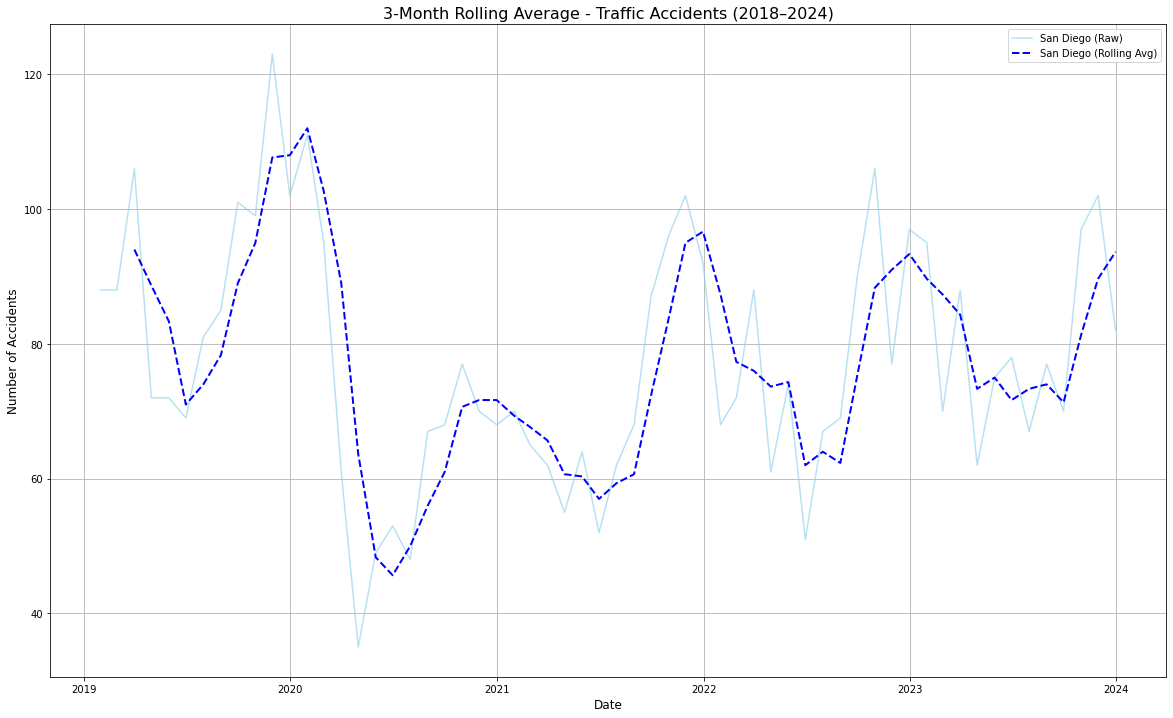

In [279]:
sd_monthly = sd_filtered.resample('M', on='COLLISION_DATE').size()
sd_monthly_rolling = sd_monthly.rolling(window=3).mean()

plt.figure(figsize=(20, 12))

plt.plot(sd_monthly, label='San Diego (Raw)', color='skyblue', alpha=0.6, linestyle='-')
plt.plot(sd_monthly_rolling, label='San Diego (Rolling Avg)', color='blue', linestyle='--', linewidth=2)

plt.title('3-Month Rolling Average - Traffic Accidents (2018–2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### Hour vs. Weather Condition

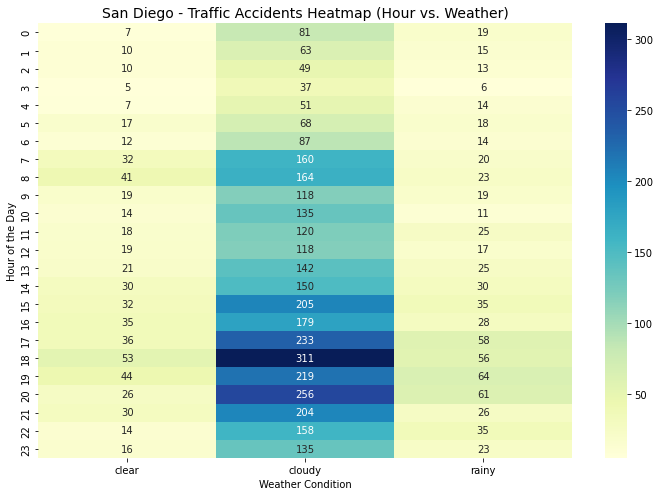

In [280]:
plt.figure(figsize=(10, 7))

sd_pivot = sd_filtered.pivot_table(index='hour', columns='weather_group', values='CASE_ID', aggfunc='count', fill_value=0)
sns.heatmap(sd_pivot, cmap='YlGnBu', annot=True, fmt='d')

plt.title('San Diego - Traffic Accidents Heatmap (Hour vs. Weather)', fontsize=14)
plt.xlabel('Weather Condition')
plt.ylabel('Hour of the Day')

plt.tight_layout()
plt.show()

#### Severity of Accidents by Weather

<Figure size 1440x1080 with 0 Axes>

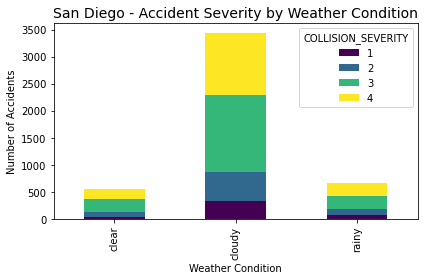

In [281]:
plt.figure(figsize=(20, 15))

sd_severity_counts = sd_filtered.groupby(['weather_group', 'COLLISION_SEVERITY']).size().unstack(fill_value=0)
sd_severity_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('San Diego - Accident Severity by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

#### Accidents Frequency by Road Type

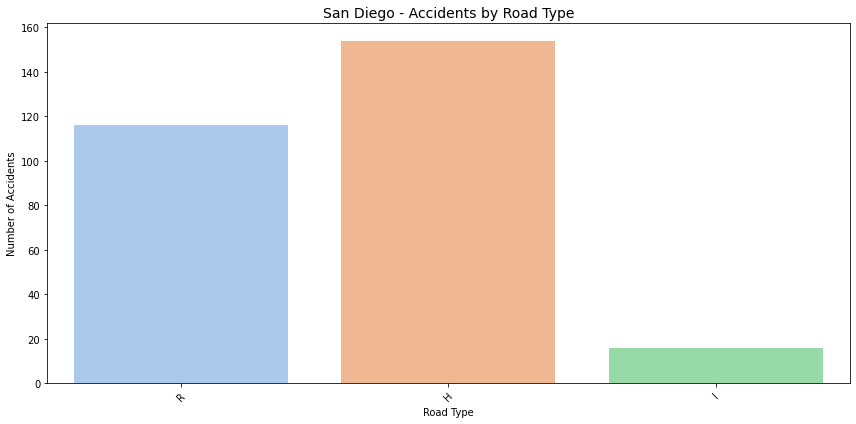

In [282]:
plt.figure(figsize=(12, 6))

sns.countplot(x='LOCATION_TYPE', data=sd_filtered, palette='pastel')
plt.title('San Diego - Accidents by Road Type', fontsize=14)
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Seasonal Impact on Accidents

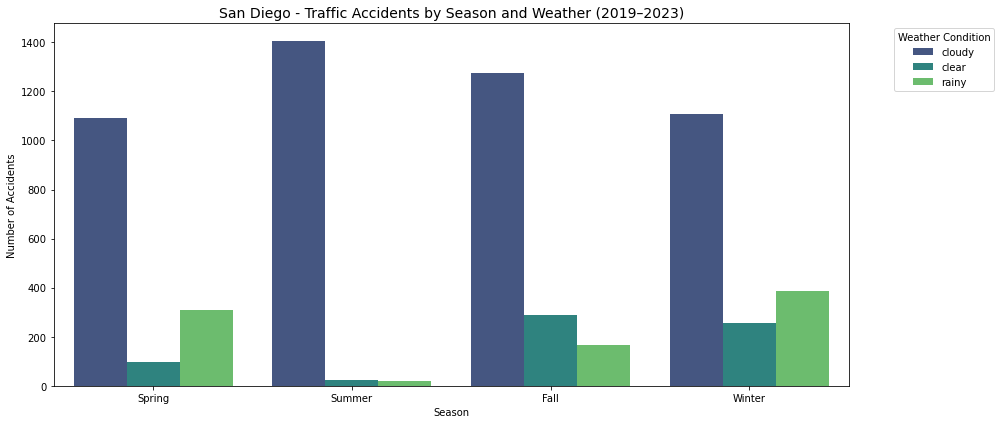

In [283]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x='season', 
    hue='weather_group', 
    data=sd_combined, 
    palette='viridis',
    order=season_order
)
plt.title('San Diego - Traffic Accidents by Season and Weather (2019–2023)', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Correlation Matrix

In [284]:
sd_combined = pd.merge(
    sd_combined,
    sd_weather[['datetime', 'temp', 'humidity', 'windspeed', 'cloudcover']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

sd_combined['COLLISION_TIME'] = pd.to_numeric(sd_combined['COLLISION_TIME'], errors='coerce')
sd_combined['COLLISION_TIME'] = sd_combined['COLLISION_TIME'].astype(str).str.zfill(4)
sd_combined['hour'] = pd.to_datetime(sd_combined['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
sd_combined.dropna(subset=['hour'], inplace=True)

weather_cols = ['temp', 'humidity', 'windspeed', 'cloudcover']
for col in weather_cols:
    if col in sd_combined.columns:
        sd_combined[col].fillna(sd_combined[col].mean(), inplace=True)

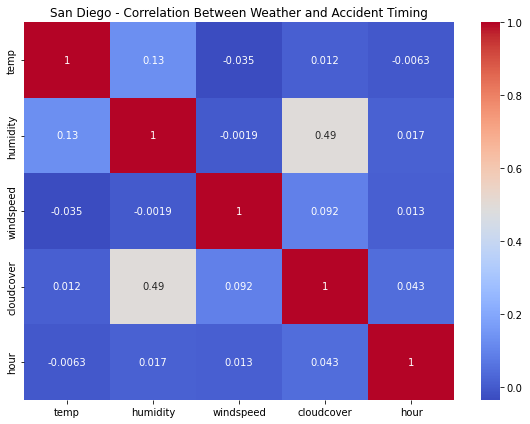

In [285]:
plt.figure(figsize=(8, 6))
sd_corr = sd_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']].corr()
sns.heatmap(sd_corr, cmap='coolwarm', annot=True)
plt.title('San Diego - Correlation Between Weather and Accident Timing')
plt.tight_layout()
plt.show()

#### Light Conditions

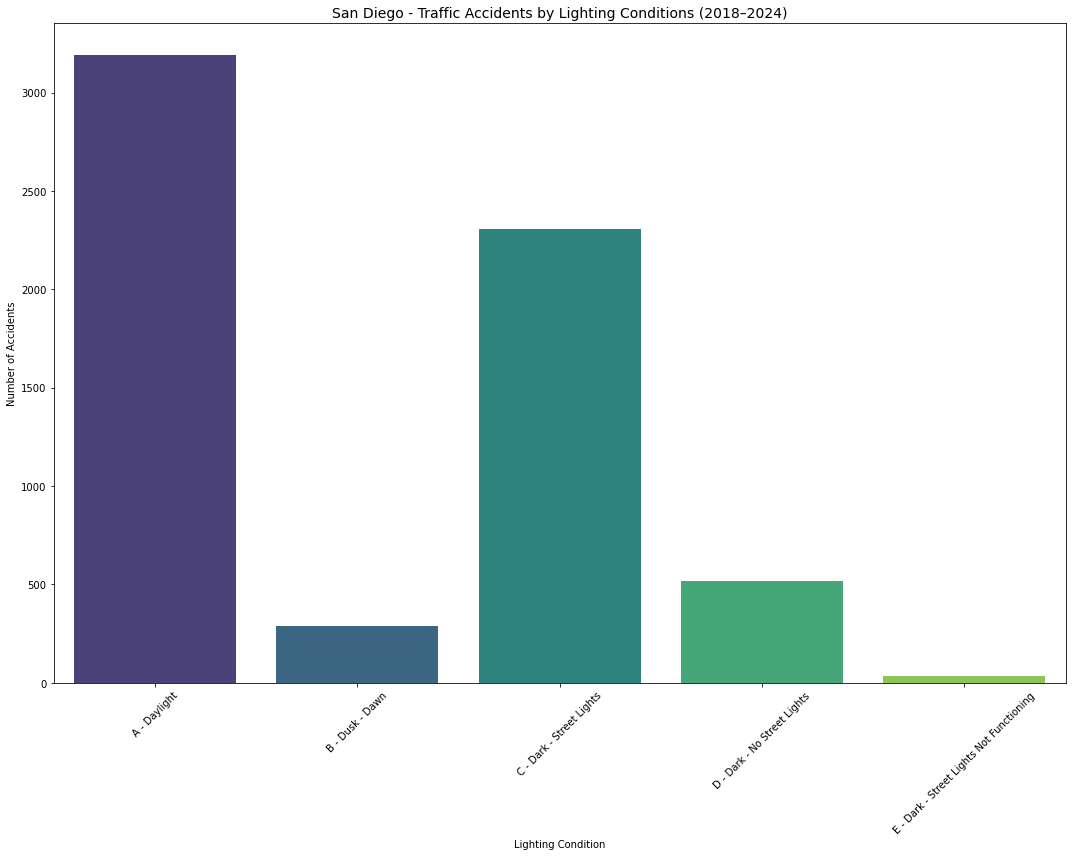

In [296]:
lighting_order = ['A', 'B', 'C', 'D', 'E']
lighting_labels = [
    'A - Daylight', 
    'B - Dusk - Dawn', 
    'C - Dark - Street Lights', 
    'D - Dark - No Street Lights', 
    'E - Dark - Street Lights Not Functioning'
]

plt.figure(figsize=(15, 12))

sns.countplot(
    x='LIGHTING',
    data=sd_combined,
    order=lighting_order,
    palette='viridis'
)
plt.title('San Diego - Traffic Accidents by Lighting Conditions (2018–2024)', fontsize=14)
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(lighting_labels)), labels=lighting_labels, rotation=45)

plt.tight_layout()
plt.show()

#### Top Causes of Accidents

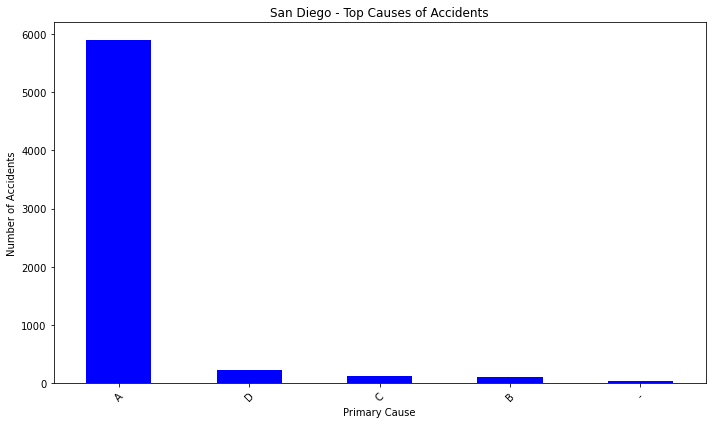

In [287]:
plt.figure(figsize=(10, 6))

sd_combined['PRIMARY_COLL_FACTOR'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('San Diego - Top Causes of Accidents')
plt.xlabel('Primary Cause')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Accidents by Vehicle Type

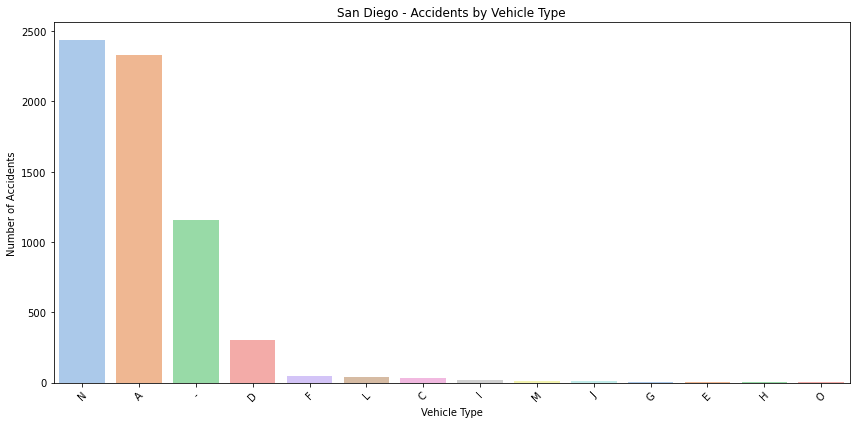

In [288]:
plt.figure(figsize=(12, 6))

sns.countplot(
    x='STWD_VEHTYPE_AT_FAULT', 
    data=sd_combined, 
    order=sd_combined['STWD_VEHTYPE_AT_FAULT'].value_counts().index,
    palette='pastel'
)
plt.title('San Diego - Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Traffic Control Device Impact on Accidents

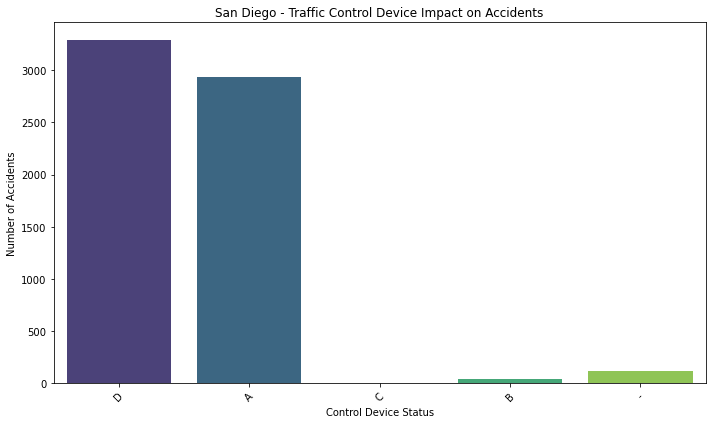

In [289]:
plt.figure(figsize=(10, 6))

sns.countplot(x='CONTROL_DEVICE', data=sd_combined, palette='viridis')
plt.title('San Diego - Traffic Control Device Impact on Accidents')
plt.xlabel('Control Device Status')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Alcohol Influence on Accidents

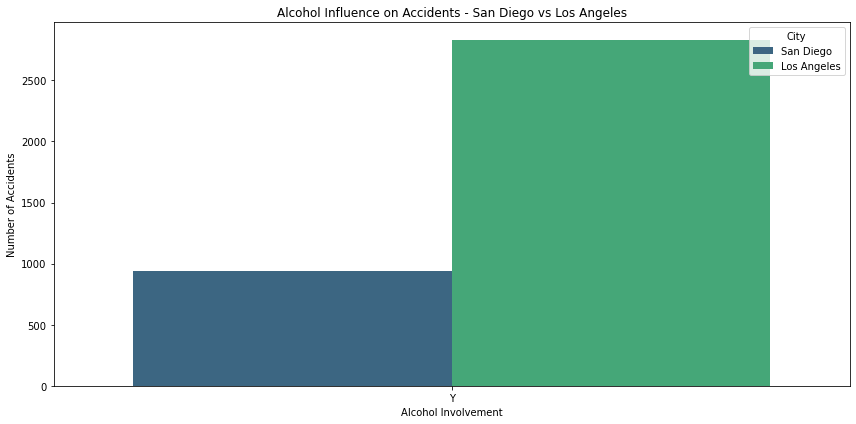

In [290]:
sd_combined['City'] = 'San Diego'
la_combined['City'] = 'Los Angeles'
combined = pd.concat([sd_combined, la_combined])

plt.figure(figsize=(12, 6))
sns.countplot(
    x='ALCOHOL_INVOLVED',
    hue='City', 
    data=combined,
    palette='viridis'
)

plt.title('Alcohol Influence on Accidents - San Diego vs Los Angeles')
plt.xlabel('Alcohol Involvement')
plt.ylabel('Number of Accidents')
plt.legend(title='City', loc='upper right')
plt.tight_layout()
plt.show()

In [291]:
import pandas as pd
la = pd.read_csv('/Users/annaywj/Desktop/SDSU/BDA600/Capstone/los_angeles_combined.csv')
sd = pd.read_csv('/Users/annaywj/Desktop/SDSU/BDA600/Capstone/san_diego_combined.csv')

In [292]:
relevant_columns = [
    'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK',
    'hour', 
    'city',  
    'weather_condition', 'temperature', 'humidity', 'windspeed', 'cloudcover',
    'lighting_condition', 'collision_severity', 'collision_cause',
    'vehicle_type', 'alcohol_involved', 'traffic_control_device_status'
]

In [293]:
la_columns_available = [col for col in relevant_columns if col in la.columns]
sd_columns_available = [col for col in relevant_columns if col in sd.columns]

la['city'] = 'Los Angeles'
sd['city'] = 'San Diego'

la_filtered = la[la_columns_available + ['city']]
sd_filtered = sd[sd_columns_available + ['city']]

In [294]:
combined_df = pd.concat([la_filtered, sd_filtered], ignore_index=True)

In [295]:
combined_df.to_csv("/Users/annaywj/Desktop/SDSU/BDA600/Capstone/filtered_accident_analysis.csv", index=False)